In [76]:
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from time import time
import matplotlib.pyplot as plt

In [77]:
# We will directly pass the best pipeline which is already trained
def benchmark(clf, X_test, y_test, categories, name= 'classifier'):
#     print("parameters:", params)
#     t0 = time()
#     clf = clf_class(**params).fit(X_train, y_train)
#     print("done in %fs" % (time() - t0))

    print("Predicting the outcomes of the testing set")
    t0 = time()
    pred = clf.predict(X_test)
    print("done in %fs" % (time() - t0))
    
    print (" Printing Accuracy of the classifier")
    print (accuracy_score(y_test, pred))
    print ()

    print("Classification report on test set for classifier:")
    print(clf)
    print()
    print(classification_report(y_test, pred, target_names=categories))
    
    print ()
    print ("FI score metrics")
    print (precision_recall_fscore_support(y_test, pred, average='weighted'))

    cm = confusion_matrix(y_test, pred)
    print("Confusion matrix:")
    print(cm)

    # Show confusion matrix
    plt.matshow(cm)
    plt.title('CM of the %s ' % name)
    plt.colorbar()

In [78]:

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size= 0.2,random_state=42 )
X_train.shape

(120, 4)

In [79]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [80]:

print(X_train[:5])

[[4.6 3.6 1.  0.2]
 [5.7 4.4 1.5 0.4]
 [6.7 3.1 4.4 1.4]
 [4.8 3.4 1.6 0.2]
 [4.4 3.2 1.3 0.2]]


In [81]:
class DummyEstimator(BaseEstimator):
    def fit(self): pass
    def score(self): pass
    
    


pipeline = Pipeline([
    ('minmax', MinMaxScaler()),
    ('clf', DummyEstimator()),
])

# A fit transform followed by an estimator

search_space = [
    {
        'minmax': (MinMaxScaler(),),
        'clf': (LogisticRegression(),),
        'clf__C': ( 0.1, 1, 10),
        'clf__penalty': ('l2', 'l1'),
    }, 
    {
        'minmax': (MinMaxScaler(),),
        'clf': (RandomForestClassifier(),),
        'clf__n_estimators': (10,20,30,50),
        'clf__max_depth': (5,10,20),
    },
    {
        'minmax': (MinMaxScaler(),),
        'clf': (DecisionTreeClassifier(),),
        'clf__max_depth': (1,5,10,25,50),
    }, 
]

In [82]:
gs_clf = GridSearchCV(pipeline, search_space, cv=5, verbose=1)

In [83]:
gs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 23 candidates, totalling 115 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/s2917623/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/s2917623/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/s2917623/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/s2917623/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning

[Parallel(n_jobs=1)]: Done 115 out of 115 | elapsed:    1.3s finished
/Users/s2917623/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/s2917623/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('minmax',
                                        MinMaxScaler(copy=True,
                                                     feature_range=(0, 1))),
                                       ('clf', DummyEstimator())],
                                verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'clf': (LogisticRegression(C=10, class_weight=None,
                                                     dual=False,
                                                     fit_intercept=True,
                                                     intercept_scaling=1,
                                                     l1_ratio=None,
                                                     max_iter=100,
                                                     mult...
                                                         max_leaf_nodes=N

In [84]:
gs_clf.best_params_
# {'clf__C': 0.1}

gs_clf.best_score_
# 0.702290076336

print (f" best estimator is {gs_clf.best_params_} and score is {gs_clf.best_score_}")

 best estimator is {'clf': LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False), 'clf__C': 10, 'clf__penalty': 'l1', 'minmax': MinMaxScaler(copy=True, feature_range=(0, 1))} and score is 0.95


In [85]:
selected_pipeline= gs_clf.best_estimator_

In [86]:
y_pred = selected_pipeline.predict(X_test)

Predicting the outcomes of the testing set
done in 0.000515s
 Printing Accuracy of the classifier
1.0

Classification report on test set for classifier:
Pipeline(memory=None,
         steps=[('minmax', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('clf',
                 LogisticRegression(C=10, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l1', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11


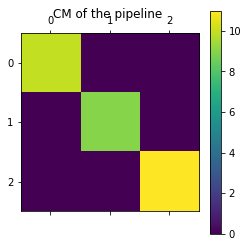

In [87]:
benchmark(selected_pipeline, X_test, y_test, iris.target_names, name= 'pipeline')